### What factors made people more likely to survive?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df=pd.read_csv('titanic_data.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
surviveds=titanic_df[titanic_df['Survived']==1] #só sobreviventes
num_surviveds=len(surviveds)
print(f'Número de sobreviventes: {num_surviveds}')
print(f'Média de sobreviventes: {num_surviveds/891}')
non_surviveds=titanic_df[titanic_df['Survived']==0] # só não sobreviventes
num_non_surviveds=len(non_surviveds)
print(f'Número de mortos: {num_non_surviveds}')
print(f'Média de mortos: {num_non_surviveds/891}')

Número de sobreviventes: 342
Média de sobreviventes: 0.3838383838383838
Número de mortos: 549
Média de mortos: 0.6161616161616161


In [5]:
def change_survived(x):
    if x==0:
        x=1
    return x
def change_survived2(x1):
    return x1.apply(change_survived)
non_surviveds_modificated=non_surviveds.apply(change_survived2)

In [6]:
surviveds_grouped_sex=surviveds.groupby('Sex')['Survived'].sum()
print(f'Números de Sobreviventes por sexo:')
print(surviveds_grouped_sex)
non_surviveds_grouped_sex=non_surviveds_modificated.groupby('Sex')['Survived'].sum()
print(f'\nNúmeros de Mortos por sexo:')
print(non_surviveds_grouped_sex)
print('\nPode se observar que as pessoas do sexo feminino foram mais propensas a sobreviver')

Números de Sobreviventes por sexo:
Sex
female    233
male      109
Name: Survived, dtype: int64

Números de Mortos por sexo:
Sex
female     81
male      468
Name: Survived, dtype: int64

Pode se observar que as pessoas do sexo feminino foram mais propensas a sobreviver


In [7]:
""" figure=plt.figure(figsize=(10,4))
figure.add_subplot(121)
sns.scatterplot(surviveds,x='Age',y='Parch',color='green')
plt.title('Quantidade de filhos/pais por idade dos sobreviventes a bordo',size=11)
figure.add_subplot(122)
sns.scatterplot(non_surviveds,x='Age',y='Parch',color='red')
plt.title('Quantidade de filhos/pais por idade dos mortos a bordo',size=11)
plt.show(figure)
print('Obeservamos que a quantidade de filhos/pais a bordo não é um fator determinante que influenciou no número de sobreviventes') """

" figure=plt.figure(figsize=(10,4))\nfigure.add_subplot(121)\nsns.scatterplot(surviveds,x='Age',y='Parch',color='green')\nplt.title('Quantidade de filhos/pais por idade dos sobreviventes a bordo',size=11)\nfigure.add_subplot(122)\nsns.scatterplot(non_surviveds,x='Age',y='Parch',color='red')\nplt.title('Quantidade de filhos/pais por idade dos mortos a bordo',size=11)\nplt.show(figure)\nprint('Obeservamos que a quantidade de filhos/pais a bordo não é um fator determinante que influenciou no número de sobreviventes') "

In [8]:
""" figure=plt.figure(figsize=(10,4))
figure.add_subplot(121)
sns.scatterplot(surviveds,x='Age',y='SibSp',color='green')
plt.title('Quantidade de irmãos/esposas por idade dos sobreviventes a bordo',size=10)
figure.add_subplot(122)
sns.scatterplot(non_surviveds,x='Age',y='SibSp',color='red')
plt.title('Quantidade de irmãos/esposas por idade dos mortos a bordo',size=10)
plt.show(figure)
print('Obeservamos que a quantidade de irmãos/esposas a bordo não é um fator determinante que influenciou no número de sobreviventes') """

" figure=plt.figure(figsize=(10,4))\nfigure.add_subplot(121)\nsns.scatterplot(surviveds,x='Age',y='SibSp',color='green')\nplt.title('Quantidade de irmãos/esposas por idade dos sobreviventes a bordo',size=10)\nfigure.add_subplot(122)\nsns.scatterplot(non_surviveds,x='Age',y='SibSp',color='red')\nplt.title('Quantidade de irmãos/esposas por idade dos mortos a bordo',size=10)\nplt.show(figure)\nprint('Obeservamos que a quantidade de irmãos/esposas a bordo não é um fator determinante que influenciou no número de sobreviventes') "

In [9]:
#surviveds_grouped_pclass=surviveds.groupby('Pclass')['Survived'].sum()
num_surviveds_pclass1=len(surviveds[surviveds['Pclass']==1])
num_surviveds_pclass2=len(surviveds[surviveds['Pclass']==2])
num_surviveds_pclass3=len(surviveds[surviveds['Pclass']==3])
print(f'Número de Sobreviventes em cada classe do Navio:\nClasse 1: {num_surviveds_pclass1}\nClasse 2: {num_surviveds_pclass2}\nClasse 3: {num_surviveds_pclass3}')
num_non_surviveds_pclass1=len(non_surviveds[non_surviveds['Pclass']==1])
num_non_surviveds_pclass2=len(non_surviveds[non_surviveds['Pclass']==2])
num_non_surviveds_pclass3=len(non_surviveds[non_surviveds['Pclass']==3]) 
print(f'\nNúmero de Mortos em cada classe do Navio:\nClasse 1: {num_non_surviveds_pclass1}\nClasse 2: {num_non_surviveds_pclass2}\nClasse 3: {num_non_surviveds_pclass3}')

print('\nPode se obsevar que os passageiros que estavam nas classes  1 e 2 foram mais propensos a sobreviver')

Número de Sobreviventes em cada classe do Navio:
Classe 1: 136
Classe 2: 87
Classe 3: 119

Número de Mortos em cada classe do Navio:
Classe 1: 80
Classe 2: 97
Classe 3: 372

Pode se obsevar que os passageiros que estavam nas classes  1 e 2 foram mais propensos a sobreviver


In [10]:
surviveds_grouped_pclass_sex=surviveds.groupby(['Pclass','Sex'])['Survived'].sum()
print('Número de Sobreviventes por sexo em cada classe:')
print(surviveds_grouped_pclass_sex)
non_surviveds_grouped_pclass_sex=non_surviveds_modificated.groupby(['Pclass','Sex'])['Survived'].sum()
print('\nNúmero de Mortos por sexo em cada classe:')
print(non_surviveds_grouped_pclass_sex)
print('\nPode se obsevar que os passageiros do sexo feminino que estavam nas classes  1 e 2 foram mais propensos a sobreviver')

Número de Sobreviventes por sexo em cada classe:
Pclass  Sex   
1       female    91
        male      45
2       female    70
        male      17
3       female    72
        male      47
Name: Survived, dtype: int64

Número de Mortos por sexo em cada classe:
Pclass  Sex   
1       female      3
        male       77
2       female      6
        male       91
3       female     72
        male      300
Name: Survived, dtype: int64

Pode se obsevar que os passageiros do sexo feminino que estavam nas classes  1 e 2 foram mais propensos a sobreviver


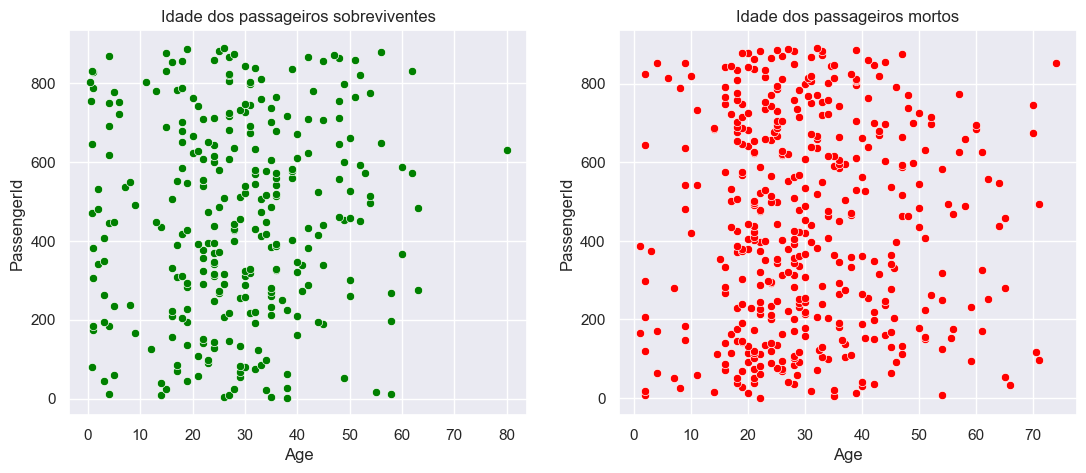

Analisando os gráficos vemos que a idade foi um fator propenso para a sobrevivencia


In [56]:
sns.set_theme()
figure=plt.figure(figsize=(13,5))
figure.add_subplot(121)
sns.scatterplot(data=surviveds,x='Age',y='PassengerId',color='green')
plt.title('Idade dos passageiros sobreviventes')
figure.add_subplot(122)
sns.scatterplot(data=non_surviveds,x='Age',y='PassengerId',color='red')
plt.title('Idade dos passageiros mortos')
plt.show(figure)
print('Analisando os gráficos vemos que a idade foi um fator propenso para a sobrevivencia')

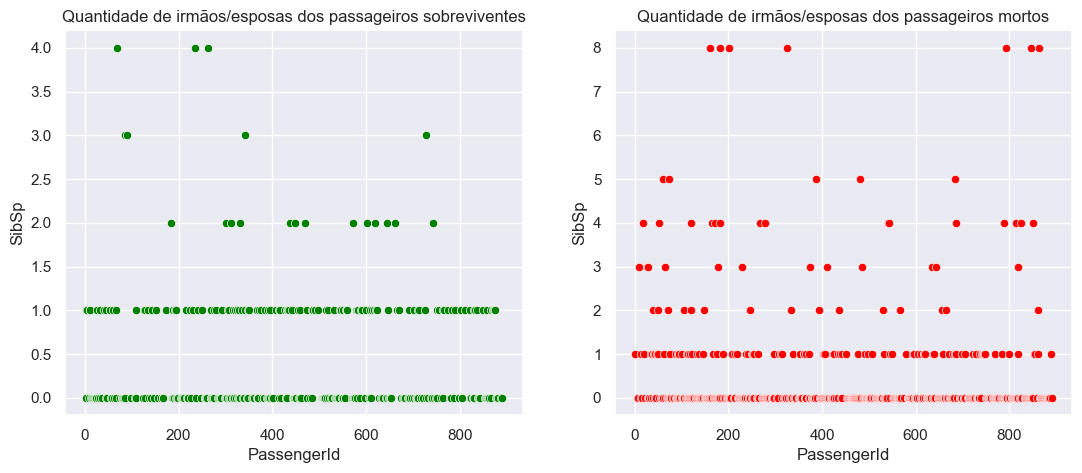

Analisando os gráficos vemos que o número de irmãos/esposas nao foi um fator propenso para a sobrevivência


In [53]:
sns.set_theme()
figure=plt.figure(figsize=(13,5))
figure.add_subplot(121)
sns.scatterplot(data=surviveds,x='PassengerId',y='SibSp',color='green')
plt.title('Quantidade de irmãos/esposas dos passageiros sobreviventes')
figure.add_subplot(122)
sns.scatterplot(data=non_surviveds,x='PassengerId',y='SibSp',color='red')
plt.title('Quantidade de irmãos/esposas dos passageiros mortos')
plt.show(figure)
print('Analisando os gráficos vemos que o número de irmãos/esposas a bordo nao foi um fator propenso para a sobrevivência')

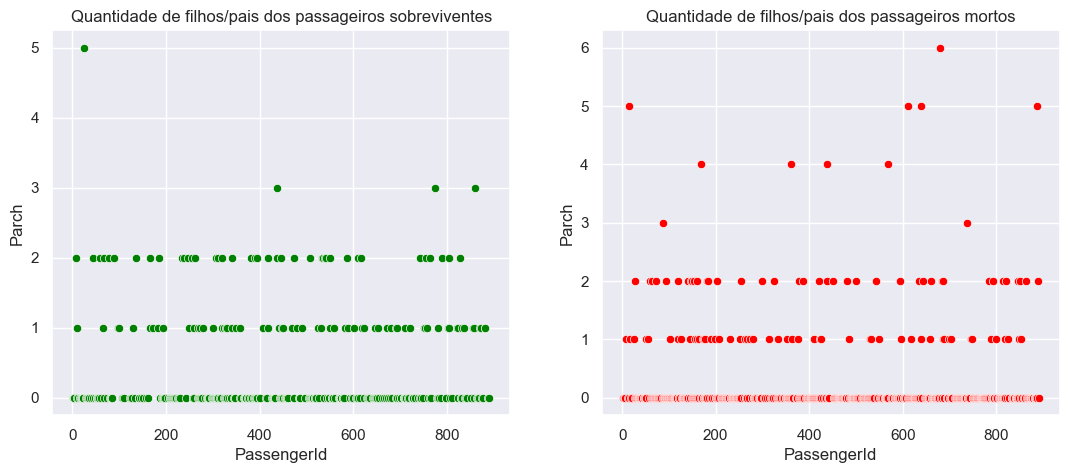

Analisando os gráficos vemos que o número de filhos/pais a bordo nao foi um fator propenso para a sobrevivência


In [65]:
sns.set_theme()
figure=plt.figure(figsize=(13,5))
figure.add_subplot(121)
sns.scatterplot(data=surviveds,x='PassengerId',y='Parch',color='green')
plt.title('Quantidade de filhos/pais dos passageiros sobreviventes')
figure.add_subplot(122)
sns.scatterplot(data=non_surviveds,x='PassengerId',y='Parch',color='red')
plt.title('Quantidade de filhos/pais dos passageiros mortos')
plt.show(figure)
print('Analisando os gráficos vemos que o número de filhos/pais a bordo nao foi um fator propenso para a sobrevivência')

In [59]:
surviveds_grouped_embarked=surviveds.groupby('Embarked')['Survived'].sum()
print(surviveds_grouped_embarked)
non_surviveds_grouped_embarked=non_surviveds_modificated.groupby('Embarked')['Survived'].sum()
print(non_surviveds_grouped_embarked)

Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64
Embarked
C     75
Q     47
S    427
Name: Survived, dtype: int64


In [74]:
surviveds_grouped_embarked_sex=surviveds.groupby(['Embarked','Sex'])['Survived'].sum()
print(surviveds_grouped_embarked_sex)
non_surviveds_grouped_embarked_sex=non_surviveds_modificated.groupby(['Embarked','Sex'])['Survived'].sum()
print(non_surviveds_grouped_embarked_sex)
print('Observando os dados pode se concluir que os passageiros que embarcaram em Southampton e eram do sexo feminino foram mais propensos a sobreviver')

Embarked  Sex   
C         female     64
          male       29
Q         female     27
          male        3
S         female    140
          male       77
Name: Survived, dtype: int64
Embarked  Sex   
C         female      9
          male       66
Q         female      9
          male       38
S         female     63
          male      364
Name: Survived, dtype: int64


### What factors made people more likely to survive?
### (Que fatores tornaram as pessoas mais propensas a sobreviver?)

De acordo com a análise feita, os fatores que tornaram as pessoas mais propensas a sobreviver foram:

* Ser do sexo feminino
* Ser do sexo feminino e estar nas classes 1 e 2
* Ter idade fora do intervalo de 20 a 30 anos
* Ser do sexo feminino e ter embarcado em Southampton